# [실습2] 이산확률분포 실습

In [4]:
# 패키지 임포트
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

# os에 따른 Font 깨짐 제거를 위해 Font 지정
if os.name == 'nt' :
    font_family = "Malgun Gothic"
    
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [6]:
# 1. 베르누이 분포
# 확률론과 통계학에서 매 시행마다 오직 두가지의 가능한 겨로가만 일어난다ㄹ고 할 때,
# 이러한 실험을 1회 시행하여 일어난 두 가지 결과에 의해 그 값이 각각 0과 21로 결정되는 확률분포
# 베르누이분포 정의
# stats.bernoullif() : 베르누이 확률 변수 클래스
mu = 0.7
bern = stats.bernoulli(mu)

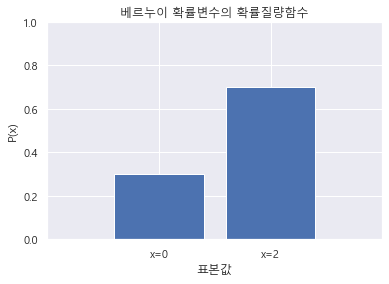

In [8]:
## 확률질량함수 계산 및 시각화
b_x = [0,1]
bern_pmf = bern.pmf(b_x)

# 시각화
plt.bar(b_x, bern_pmf)
plt.xlim(-1, 2)
plt.ylim(0,1)
plt.xticks([0,1], ["x=0","x=2"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

In [10]:
# 베르누이 검정을 위한 베르누이 샘플 100개 생성
x_sample_bern = bern.rvs(100, random_state=0)

In [11]:
x_sample_bern

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [17]:
# 베르누이 시뮬레이션
y_bern = np.bincount(x_sample_bern, minlength=2) / float(len(x_sample_bern))

df_bern = pd.DataFrame({"결과" : bern_pmf, "검증(시뮬레이션0" : y_bern})
df_bern.index = [0,1]
df_bern

,결과,검증(시뮬레이션0
0,0.3,0.23
1,0.7,0.77


In [19]:
# 2) 이항분포
'''
-'성공'에 해당하는 사상이 출현랄 확률이 p인 똑같은 베르누이시행을 독립적으로 n번 반복해서 시행하여 일너난 두 가지 결과에 의해
그 값이 각각 0과 1로 결정되는 확률분포
'''

# stats.binom.pmf(성공횟수, n='실험 횟수',' p='성공확률')

## scipy 이항분포 확률질량함수 계싼

# 0.3의 확률을 갖는 15회의 실험에서 3회 성공할 확률 반환
print("k=3, n=15, p=0.3의 PMF:", stats.binom.pmf(3, n=15, p=0.3))

# 0.3의 확률을 갖는 15회의 실험에서 0 ~ 4회 성공할 확률의 누적갑 ㅅ반환
print("k=0~4, n=15, p=0.3의 PMF:", stats.binom.cdf(4, n=15, p=0.3))

k=3, n=15, p=0.3의 PMF: 0.17004021326428564
k=0~4, n=15, p=0.3의 PMF: 0.5154910592268429


In [25]:
# p의 확률을 갖는 n회의 시행에서 k회 성공할 (일너라) 확률을 반환하는 함수 생성'
def bion_dist(k, n, p):
    pmf_bion=stats.binom.pmf(k, n= n, p= p)
    return pmf_bion

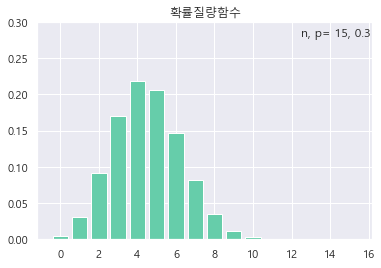

In [26]:
# 0~15 범위 생성 : 성공 횟수
x = np.arange(0,16)

# 확률질량함수의 값  array
pdf_result = [bion_dist(k, 15, 0.3)for k in range(0,16)]

# 시각화
plt.title("확률질량함수")
plt.ylim(0,0.3)
plt.text(12.5, 0.28, 'n, p= 15, 0.3')
plt.bar(x, pdf_result, color='mediumaquamarine')
plt.show()

In [27]:
# 3) 포하송분포
'''
-어떤 단위 시간 동안 발생한 사건 횟수를 x라 했을 때 확률분포
-stats.poisson.pfm(n='시행수',lamb='평균 발생 수 : 기대값')
-n회의 사건이 일어날 확률을 반환
'''
# scipy 포아송 함수
# 3번의 시행에서 평ㅇ균 사건 수 (기대값 2)에 대한 발생 확률
stats.poisson.pmf(3,2,loc=0)

0.18044704431548356

In [34]:
# n번의 시행에서 평균 사건 수 (기대값, 랍다)에 대한 발생 확률 함수
def pois_dist(n, lamb):
    pmf_poi = stats.poisson.pmf(n, lamb, loc=0)
    return pmf_poi

In [35]:
x = np.arange(0, 41)
poi_pdf_result = [pois_dist(n, 10) for n in range(0, 41)]

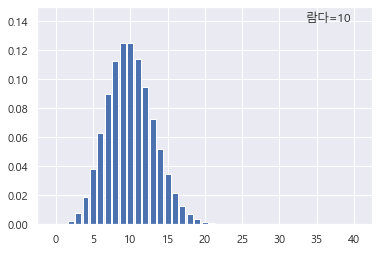

In [38]:
plt.ylim(0,0.15)
plt.text(33.5, 0.14, '람다=10')
plt.bar(x, poi_pdf_result)
plt.show()

<BarContainer object of 41 artists>

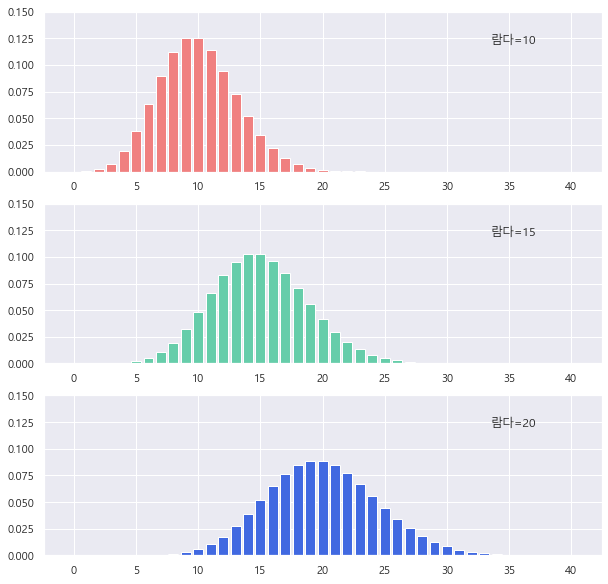

In [41]:
## 기대값에 따른 포아송분포 차이 확인

x = np.arange(0,41)

fig = plt.figure(figsize = (10, 10))

fig.add_subplot(3,1,1)
pmf_poin1 = np.array([pois_dist(n, 10) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12,'람다=10')
plt.bar(x, pmf_poin1, color='lightcoral')

fig.add_subplot(3,1,2)
pmf_poin1 = np.array([pois_dist(n, 15) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12,'람다=15')
plt.bar(x, pmf_poin1, color='mediumaquamarine')

fig.add_subplot(3,1,3)
pmf_poin1 = np.array([pois_dist(n, 20) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12,'람다=20')
plt.bar(x, pmf_poin1, color='royalblue')
